###  Import

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
from time import time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()

# supervised learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale
from sklearn.externals import joblib
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score   
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
# Import cleaned dataset
df = pd.read_csv('persistence/cleaned_data_2018-06-19.csv', parse_dates=True, index_col='date')
df.head()

,pm25,dewp,temp,pres,wind_speed,snow_hours,rain_hours
date,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0


### Supervised Learning 

In [5]:
# Prepare lag features out to 24-hours
df['pm25_lag1'] = df['pm25'].diff(periods=-1)
df['pm25_lag2'] = df['pm25'].diff(periods=-2)
df['pm25_lag3'] = df['pm25'].diff(periods=-3)
df['pm25_lag4'] = df['pm25'].diff(periods=-4)
df['pm25_lag5'] = df['pm25'].diff(periods=-5)
df['pm25_lag6'] = df['pm25'].diff(periods=-6)
df['pm25_lag7'] = df['pm25'].diff(periods=-7)
df['pm25_lag8'] = df['pm25'].diff(periods=-8)
df['pm25_lag9'] = df['pm25'].diff(periods=-9)
df['pm25_lag10'] = df['pm25'].diff(periods=-10)
df['pm25_lag11'] = df['pm25'].diff(periods=-11)
df['pm25_lag12'] = df['pm25'].diff(periods=-12)
df['pm25_lag13'] = df['pm25'].diff(periods=-13)
df['pm25_lag14'] = df['pm25'].diff(periods=-14)
df['pm25_lag15'] = df['pm25'].diff(periods=-15)
df['pm25_lag16'] = df['pm25'].diff(periods=-16)
df['pm25_lag17'] = df['pm25'].diff(periods=-17)
df['pm25_lag18'] = df['pm25'].diff(periods=-18)
df['pm25_lag19'] = df['pm25'].diff(periods=-19)
df['pm25_lag20'] = df['pm25'].diff(periods=-20)
df['pm25_lag21'] = df['pm25'].diff(periods=-21)
df['pm25_lag22'] = df['pm25'].diff(periods=-22)
df['pm25_lag23'] = df['pm25'].diff(periods=-23)
df['pm25_lag24'] = df['pm25'].diff(periods=-24)

# Remove index 
df.reset_index(drop=True, inplace=True)

# Assign X and y
y = df['pm25'].iloc[:-24]
X = df.drop(['pm25'], axis=1).iloc[:-24]

# Standardize the data
Xscaled = scale(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, train_size=0.7, random_state=42)
# ###If we must retain the temporal order of the obs...
# train_size = int(len(Xscaled) * 0.77)
# X_train, X_test, = Xscaled[0:train_size], Xscaled[train_size:len(Xscaled)]
# y_train, y_test = y[0:train_size], y[train_size:len(y)]

- Consider including lags out to 1 month or 1 year.
- Consider including lags of the other variables.

Note: We cannot use standard k-fold cross-validation because it assumes each ob is independent, which doesn't hold for time series data. 

Instead, we will use a similar process that respects the temporal order of the obs, by evaluating model performance on historical data.
This process is called *backtesting* or *hindcasting*.

** Linear Regressor**

In [40]:
# Instantiate
linreg = LinearRegression(fit_intercept=True, copy_X=True)

# Fit
linreg.fit(X_train, y_train)

# Predict
ypred_linreg = linreg.predict(X_test)

# Performance Metrics
print('Linear Regression')
print('==================')
print('R2:',r2_score(y_test, ypred_linreg))
print('MSE:',mean_squared_error(y_test, ypred_linreg))
print('MAE:',mean_absolute_error(y_test, ypred_linreg))
print('Explained Variance:',explained_variance_score(y_test, ypred_linreg))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Linear Regression
R2: 0.475986126994
MSE: 4354.917064
MAE: 49.2282224925
Explained Variance: 0.476044883489


In [74]:
y_test.shape

(12520,)

Forecast Bias: -0.6987896956214985


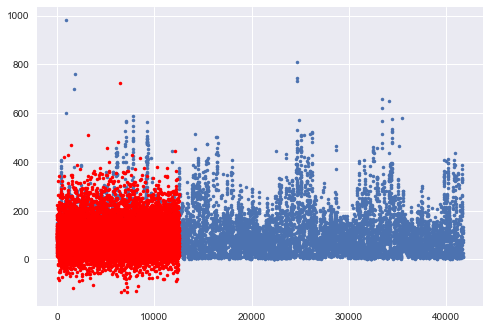

In [87]:
forecast_errors_linreg = y_test - ypred_linreg;
mean_forecast_error_linreg = np.mean(forecast_errors_linreg)
print('Forecast Bias: %s' %mean_forecast_error_linreg)

y_test.plot(linestyle='none', marker='.')
pd.Series(ypred_linreg).plot(linestyle='none', marker='.', color='r');

** KNN Regressor **

In [7]:
# Instantiate
knnr = KNeighborsRegressor()

# Fit
knnr.fit(X_train, y_train)

# Predict
ypred_knnr = knnr.predict(X_test)

# Performance Metrics
print('KNN Regressor')
print('==============')
print('R2:',r2_score(y_test, ypred_knnr))
print('MSE:',mean_squared_error(y_test, ypred_knnr))
print('MAE:',mean_absolute_error(y_test, ypred_knnr))
print('Explained Variance:',explained_variance_score(y_test, ypred_knnr))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

KNN Regressor
R2: 0.706855272024
MSE: 2436.23507668
MAE: 28.9519329073
Explained Variance: 0.72813872965


In [88]:
forecast_errors_knnr = y_test - ypred_knnr;
mean_forecast_error_knnr = np.mean(forecast_errors_knnr)
print('Forecast Bias: %s' %mean_forecast_error_knnr)

Forecast Bias: 13.299632587859453


** Gradient Descent Regressor **

In [8]:
# Instantiate
sgd = SGDRegressor()

# Fit
sgd.fit(X_train, y_train)

# Predict
ypred_sgd = sgd.predict(X_test)

# Performance Metrics
print('Stochastic Gradient Descent Regressor')
print('======================================')
print('R2:',r2_score(y_test, ypred_sgd))
print('MSE:',mean_squared_error(y_test, ypred_sgd))
print('MAE:',mean_absolute_error(y_test, ypred_sgd))
print('Explained Variance:',explained_variance_score(y_test, ypred_sgd))

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

Stochastic Gradient Descent Regressor
R2: 0.468310026543
MSE: 4418.71075833
MAE: 49.5187518745
Explained Variance: 0.468372937494


In [89]:
forecast_errors_sgd = y_test - ypred_sgd;
mean_forecast_error_sgd = np.mean(forecast_errors_sgd)
print('Forecast Bias: %s' %mean_forecast_error_sgd)

Forecast Bias: -0.7230722225629286


** Decision Tree **

In [9]:
# Instantiate
dtr = DecisionTreeRegressor()

# Fit
dtr.fit(X_train, y_train)

# Predict
ypred_dtr = dtr.predict(X_test)

# Performance Metrics
print('Decision Tree Regressor')
print('========================')
print('R2:',r2_score(y_test, ypred_dtr))
print('MSE:',mean_squared_error(y_test, ypred_dtr))
print('MAE:',mean_absolute_error(y_test, ypred_dtr))
print('Explained Variance:',explained_variance_score(y_test, ypred_dtr))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

Decision Tree Regressor
R2: 0.570164611866
MSE: 3572.22883387
MAE: 35.100399361
Explained Variance: 0.570167129491


In [90]:
forecast_errors_dtr = y_test - ypred_dtr;
mean_forecast_error_dtr = np.mean(forecast_errors_dtr)
print('Forecast Bias: %s' %mean_forecast_error_dtr)

Forecast Bias: 0.1446485623003195


** Random Forest **

In [10]:
# Instantiate
rfr = RandomForestRegressor(random_state=42)

# Fit
rfr.fit(X_train, y_train)

# Predict
ypred_rfr = rfr.predict(X_test)

# Performance Metrics
print('Random Forest Regressor')
print('========================')
print('R2:',r2_score(y_test, ypred_rfr))
print('MSE:',mean_squared_error(y_test, ypred_rfr))
print('MAE:',mean_absolute_error(y_test, ypred_rfr))
print('Explained Variance:',explained_variance_score(y_test, ypred_rfr))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

Random Forest Regressor
R2: 0.77424473003
MSE: 1876.18215495
MAE: 26.5623322684
Explained Variance: 0.774261120393


In [91]:
forecast_errors_rfr = y_test - ypred_rfr;
mean_forecast_error_rfr = np.mean(forecast_errors_rfr)
print('Forecast Bias: %s' %mean_forecast_error_rfr)

Forecast Bias: -0.36907348242811483


** Neural Network **

In [11]:
# Instantiate
nnr = MLPRegressor()

# Fit
nnr.fit(X_train, y_train)

# Predict
ypred_nnr = nnr.predict(X_test)

# Performance Metrics
print('Neural Network (Multi-Layer Perceptron) Regressor')
print('=================================================')
print('R2:',r2_score(y_test, ypred_nnr))
print('MSE:',mean_squared_error(y_test, ypred_nnr))
print('MAE:',mean_absolute_error(y_test, ypred_nnr))
print('Explained Variance:',explained_variance_score(y_test, ypred_nnr))

/Users/tami/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Neural Network (Multi-Layer Perceptron) Regressor
R2: 0.743876403173
MSE: 2128.56391743
MAE: 30.6135218604
Explained Variance: 0.743927183135


In [92]:
forecast_errors_nnr = y_test - ypred_nnr;
mean_forecast_error_nnr = np.mean(forecast_errors_nnr)
print('Forecast Bias: %s' %mean_forecast_error_nnr)

Forecast Bias: -0.649628005215178


#### Evaluation

In [96]:
# Collect the explained_variance and MSE from each algorithm
model_names = ['Linear Regression', 'kNN', 'Gradient Descent', 'Decision Tree', 'Random Forest', 'Neural Network']
model_mse_scores = [mean_squared_error(y_test, ypred_linreg), mean_squared_error(y_test, ypred_knnr), mean_squared_error(y_test, ypred_sgd),
                mean_squared_error(y_test, ypred_dtr), mean_squared_error(y_test, ypred_rfr), mean_squared_error(y_test, ypred_nnr)]
model_evar_scores = [explained_variance_score(y_test, ypred_linreg), explained_variance_score(y_test, ypred_knnr), explained_variance_score(y_test, ypred_sgd),
                explained_variance_score(y_test, ypred_dtr), explained_variance_score(y_test, ypred_rfr), explained_variance_score(y_test, ypred_nnr)]
model_forecast_bias = [mean_forecast_error_linreg, mean_forecast_error_knnr, mean_forecast_error_sgd, mean_forecast_error_dtr, mean_forecast_error_rfr, mean_forecast_error_nnr]
model_eval = pd.DataFrame(np.column_stack([model_evar_scores, model_mse_scores, model_forecast_bias]), columns=['Explained Variance', 'Mean Squared Error', 'Mean Forecast Error'], index=model_names).sort_values('Explained Variance', ascending=False)
model_eval

,Explained Variance,Mean Squared Error,Mean Forecast Error
Random Forest,0.774261,1876.182155,-0.369073
Neural Network,0.743927,2128.563917,-0.649628
kNN,0.728139,2436.235077,13.299633
Decision Tree,0.570167,3572.228834,0.144649
Linear Regression,0.476045,4354.917064,-0.698790
Gradient Descent,0.468373,4418.710758,-0.723072


- Explained Variance:  best score is 1.0, highest value is best.
- MSE:  lowest value is best.

- ** Random Forest wins **  It still has a bias toward underforecasting the PM 2.5 by 0.37 ug/m3, but this is very small compared to the average value (98.6 ug/m3)